In [81]:
import pandas as pd

In [82]:
data_playerLoggedIn = pd.read_csv("C:\\Users\\gameuser\\Desktop\\Foldera\\College\\S2\\GA\\GA_25_P1_Part3_Shane_Conroy\\data\\player_logged_in.csv")

data_exitedGame = pd.read_csv("C:\\Users\\gameuser\\Desktop\\Foldera\\College\\S2\\GA\\GA_25_P1_Part3_Shane_Conroy\\data\\exited_game.csv")

In [83]:
unique_players = data_playerLoggedIn['pid'].nunique()
print("Total unique players:", unique_players)

Total unique players: 11080


In [84]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [85]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_daily_active_users(filepath):
        
    data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)
    
    if 'Time' not in data.columns or 'pid' not in data.columns:
        print("Error: CSV must contain 'Time' and 'pid' columns.")
        return

    data['Date'] = data['Time'].dt.date
    dau = data.groupby('Date')['pid'].nunique()

    plot_dau(dau, plot_type='line')
    plot_dau(dau, plot_type='bar')

def plot_dau(dau, plot_type='line'):
    plt.figure(figsize=(12, 5))

    if plot_type == 'line':
        plt.plot(dau.index, dau.values, marker='o', linestyle='-')
        plt.grid(True)
    elif plot_type == 'bar':
        plt.bar(dau.index, dau.values, color='skyblue')
        plt.grid(axis='y')

    plt.xlabel("Date")
    plt.ylabel("Players")
    plt.title("Daily")
    plt.xticks(rotation=45)
    plt.show()



C:\Users\gameuser\AppData\Local\Temp\ipykernel_8120\3397378388.py:6: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)


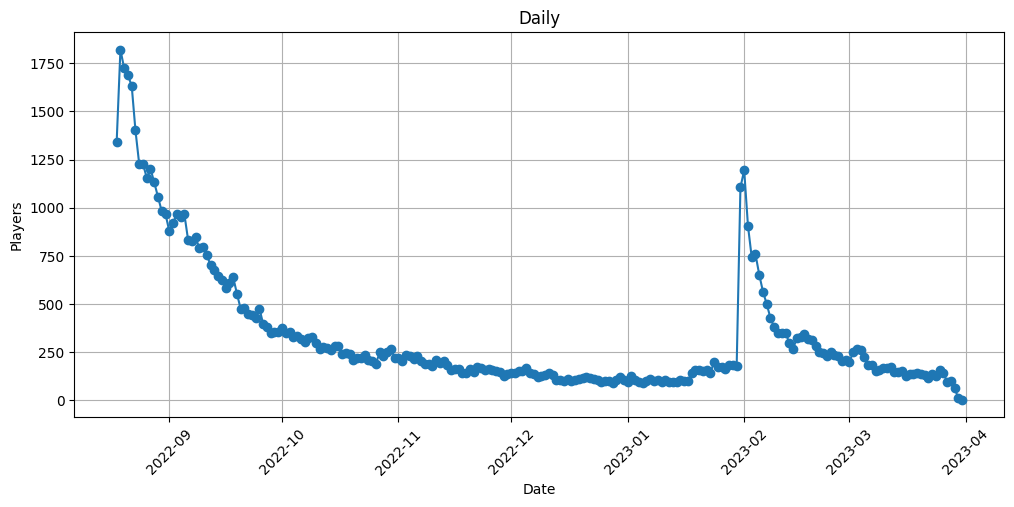

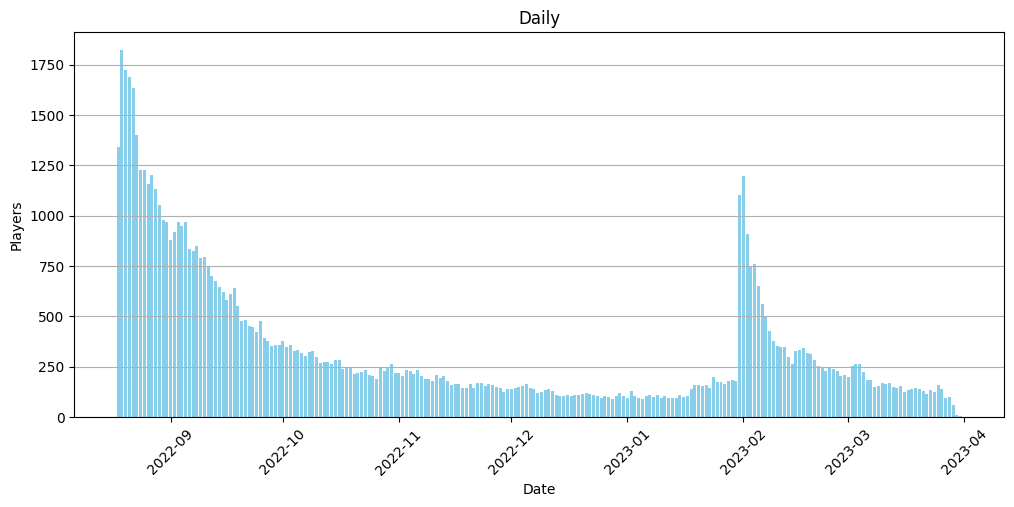

In [86]:
analyze_daily_active_users("C:\\Users\\gameuser\\Desktop\\Foldera\\College\\S2\\GA\\GA_25_P1_Part3_Shane_Conroy\\data\\player_logged_in.csv")

In [87]:
def analyze_monthly_active_users(filepath):

    data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)
    
    if 'Time' not in data.columns or 'pid' not in data.columns:
        print("Error: CSV must contain 'Time' and 'pid' columns.")
        return

    data['YearMonth'] = data['Time'].dt.to_period('M')

    mau = data.groupby('YearMonth')['pid'].nunique()

    mau.index = mau.index.astype(str)

    plot_mau(mau, plot_type='line')
    plot_mau(mau, plot_type='bar')

def plot_mau(mau, plot_type='line'):
    plt.figure(figsize=(12, 5))

    if plot_type == 'line':
        plt.plot(mau.index, mau.values, marker='o', linestyle='-')
        plt.grid(True)
    elif plot_type == 'bar':
        plt.bar(mau.index, mau.values, color='skyblue')
        plt.grid(axis='y')

    plt.xlabel("Month")
    plt.ylabel("Unique players amount")
    plt.title("Monthly users")
    plt.xticks(rotation=45)
    plt.show()



C:\Users\gameuser\AppData\Local\Temp\ipykernel_8120\2308155311.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)


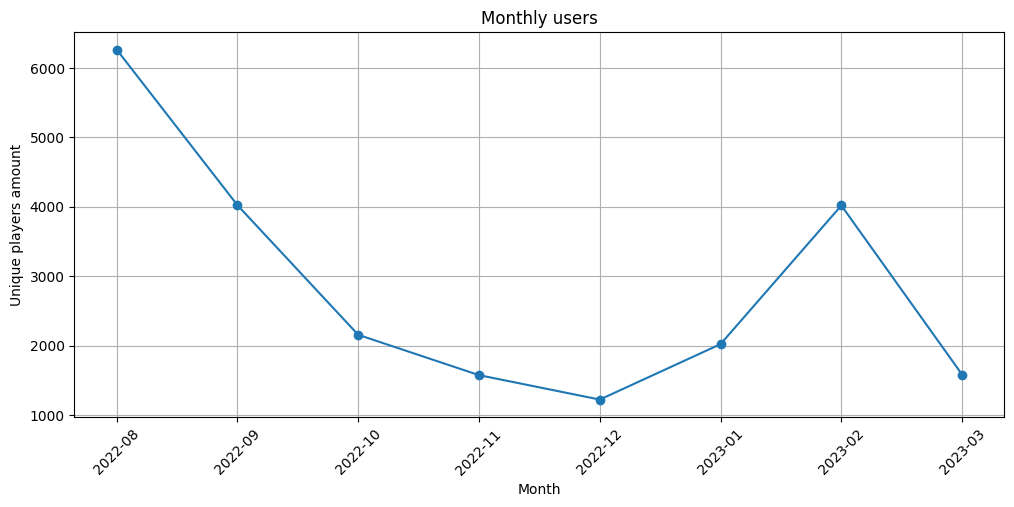

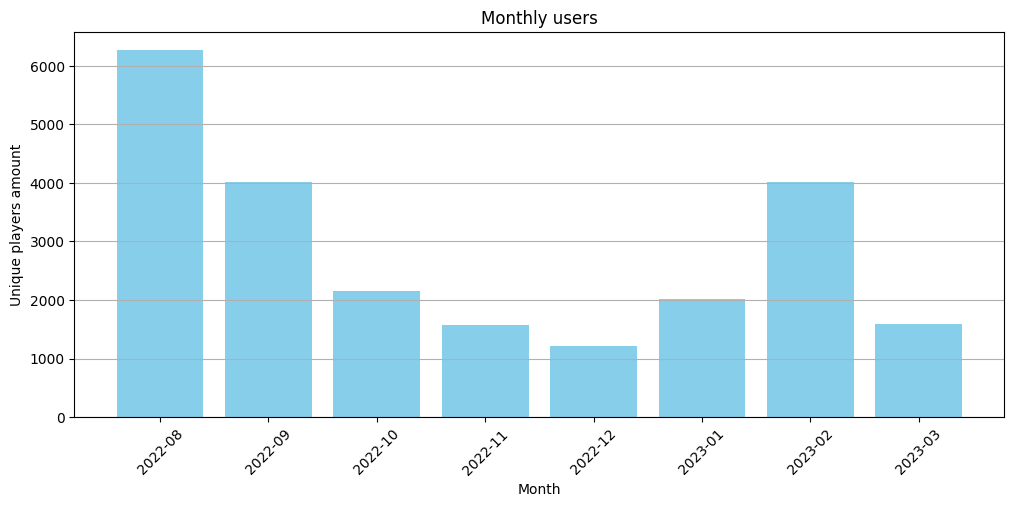

In [88]:
analyze_monthly_active_users("C:\\Users\\gameuser\\Desktop\\Foldera\\College\\S2\\GA\\GA_25_P1_Part3_Shane_Conroy\\data\\player_logged_in.csv")

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_stickiness(filepath):
    data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)
    
    if 'Time' not in data.columns or 'pid' not in data.columns:
        print("Error: CSV must contain 'Time' and 'pid' columns.")
        return
    
    data['Date'] = data['Time'].dt.date
    data['YearMonth'] = data['Time'].dt.to_period('M')
    
    dau = data.groupby('Date')['pid'].nunique()

    mau = data.groupby('YearMonth')['pid'].nunique()

    dau.index = pd.to_datetime(dau.index).to_period('M')
    stickiness = []

    for month in mau.index:
        month_dau = dau[dau.index == month]
    
        avg_dau = month_dau.mean()

        month_mau = mau[month]

        if month_mau > 0:
            stickiness.append(avg_dau / month_mau)
        else:
            stickiness.append(0)

    stickiness_series = pd.Series(stickiness, index=mau.index)

    print(stickiness_series)

    plot_stickiness(stickiness_series)

def plot_stickiness(stickiness):
    plt.figure(figsize=(12, 5))
    plt.plot(stickiness.index.astype(str), stickiness.values, marker='o', linestyle='-', color='orange')
    plt.grid(True)
    plt.xlabel("Month")
    plt.ylabel("Stickiness (DAU / MAU)")
    plt.title("Stickiness Over Time (DAU / MAU)")
    plt.xticks(rotation=45)
    plt.show()


YearMonth
2022-08    0.211560
2022-09    0.158760
2022-10    0.125619
2022-11    0.113130
2022-12    0.098147
2023-01    0.079935
2023-02    0.102405
2023-03    0.093451
Freq: M, dtype: float64


C:\Users\gameuser\AppData\Local\Temp\ipykernel_8120\3393804070.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)


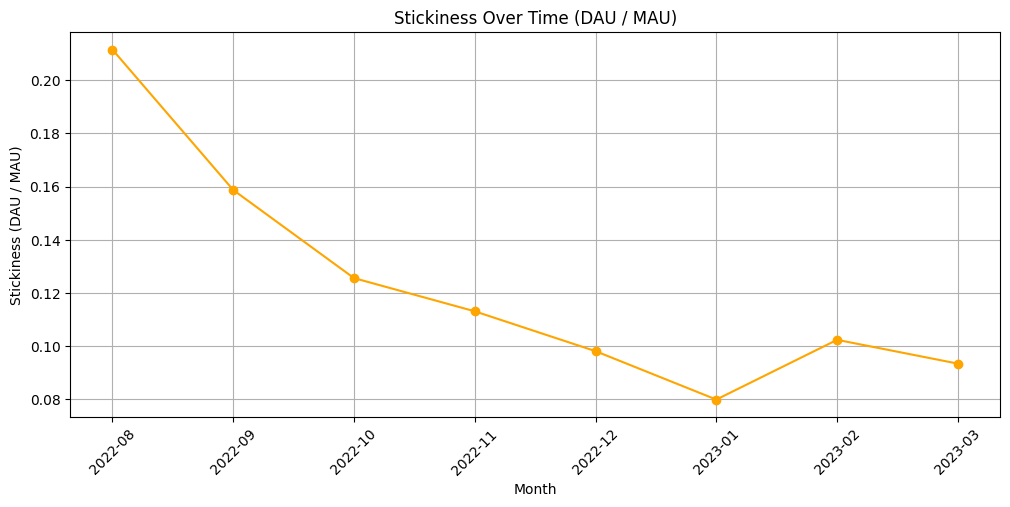

In [95]:
analyze_stickiness("C:\\Users\\gameuser\\Desktop\\Foldera\\College\\S2\\GA\\GA_25_P1_Part3_Shane_Conroy\\data\\player_logged_in.csv")